In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel("C:/Users/ehtes/Desktop/Harrisburg Uni/4. Semester/1. Machine Learning 1/Project/bankfull.xlsx")

In [3]:
df2 = pd.read_excel("C:/Users/ehtes/Desktop/Harrisburg Uni/4. Semester/1. Machine Learning 1/Project/bankfull.xlsx")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

As we can see the dataset contains 17 features so from these we can explore some questions to better understand the data
1. Which education background defaulted on loan 
2. Impact of marital status on defaults
3. Impact of age group on defaults
4. Impact of job status on default
5. Distribution of people with house loans and job status with age group. 
6. Marketing towards single people will have a high chance of success
7. It is useless to contact the people again if they have been contacted previously
8. Having a loan prior means people wont be taking new loans
9. Will educated people tend to own a house
10. Does Age impact wealth or house status and do older people tend to be divorced more. 
11. Impact of duration on Target 
12. Do people tend to accept more if contacted on landline vs cellular


In [6]:
df.info()  ### it gives us the summary about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.isnull().sum() ### gives the sum of missing values with respect to columns

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [8]:
df2['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [9]:
from numpy import array
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()
df2.job = label_encoder.fit_transform(df2.job)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
df2['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [12]:
label_encoder = LabelEncoder()
df2.marital = label_encoder.fit_transform(df2.marital)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,2,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,1,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,2,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
df2['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [14]:
label_encoder = LabelEncoder()
df2.education = label_encoder.fit_transform(df2.education)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
df2['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [16]:
label_encoder = LabelEncoder()
df2.default = label_encoder.fit_transform(df2.default)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
df2['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [18]:
label_encoder = LabelEncoder()
df2.housing = label_encoder.fit_transform(df2.housing)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,1,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,1,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,1,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,0,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
df2['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [20]:
label_encoder = LabelEncoder()
df2.loan = label_encoder.fit_transform(df2.loan)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no


In [21]:
df2['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [22]:
label_encoder = LabelEncoder()
df2.contact = label_encoder.fit_transform(df2.contact)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,unknown,no


In [23]:
df2['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [24]:
label_encoder = LabelEncoder()
df2.month = label_encoder.fit_transform(df2.month)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,unknown,no


In [25]:
df2['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [26]:
label_encoder = LabelEncoder()
df2.poutcome = label_encoder.fit_transform(df2.poutcome)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no


In [27]:
df2['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [28]:
label_encoder = LabelEncoder()
df2.Target = label_encoder.fit_transform(df2.Target)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


### Identiftying Outliers using Z-score

In [29]:
from scipy import stats
z=np.abs(stats.zscore(df2))

In [30]:
z

array([[1.60696496, 0.10381968, 0.27576178, ..., 0.25194037, 0.44489814,
        0.36398261],
       [0.28852927, 1.42400783, 1.3683719 , ..., 0.25194037, 0.44489814,
        0.36398261],
       [0.74738448, 0.71495069, 0.27576178, ..., 0.25194037, 0.44489814,
        0.36398261],
       ...,
       [2.92540065, 0.20174582, 0.27576178, ..., 1.05047333, 0.56617504,
        2.74738398],
       [1.51279098, 1.02051619, 0.27576178, ..., 0.25194037, 0.44489814,
        0.36398261],
       [0.37068857, 0.71495069, 0.27576178, ..., 4.52357654, 1.57724822,
        0.36398261]])

In [31]:
outliers=np.where(z>3)

In [32]:
outliers


(array([    7,    34,    37, ..., 45204, 45208, 45210], dtype=int64),
 array([ 4,  5, 11, ..., 14, 11, 14], dtype=int64))

In [33]:
df2.shape

(45211, 17)

### Removing Outliers

In [34]:
data2=df2[(z<3).all(axis=1)]

In [35]:
data2.shape

(39456, 17)

# Feature Selection - Using Person's Correlation to select the independent varibales

In [36]:
cor_matrix=data2.corr()

In [37]:
print(cor_matrix['Target'].sort_values(ascending=False))

Target       1.000000
duration     0.359945
previous     0.168490
pdays        0.113961
education    0.075294
balance      0.066368
marital      0.053897
job          0.040954
age         -0.008331
month       -0.018782
day         -0.029431
loan        -0.069567
campaign    -0.078479
poutcome    -0.086848
housing     -0.146502
contact     -0.157354
default           NaN
Name: Target, dtype: float64


In [38]:
cor_matrix

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.029071,-0.408913,-0.107221,NaN,0.093831,-0.159423,0.002481,0.030538,-0.010343,-0.043242,-0.024431,0.035379,-0.009981,0.008714,0.000625,-0.008331
job,-0.029071,1.000000,0.062010,0.166297,NaN,0.020184,-0.124118,-0.032185,-0.086254,0.021078,-0.091461,0.001893,0.007968,-0.001269,0.012790,-0.007559,0.040954
marital,-0.408913,0.062010,1.000000,0.113159,NaN,0.007846,-0.023880,-0.049360,-0.040982,-0.005290,-0.007282,0.013031,-0.024045,0.012580,0.015221,-0.013159,0.053897
education,-0.107221,0.166297,0.113159,1.000000,NaN,0.049742,-0.094279,-0.050649,-0.120713,0.021890,-0.058124,-0.001334,-0.001321,0.022310,0.041525,-0.038752,0.075294
default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,0.093831,0.020184,0.007846,0.049742,NaN,1.000000,-0.057852,-0.096320,-0.034057,0.011308,0.033693,0.032213,-0.016608,0.037851,0.052722,-0.058860,0.066368
housing,-0.159423,-0.124118,-0.023880,-0.094279,NaN,-0.057852,1.000000,0.042250,0.207969,-0.015128,0.272920,0.012232,-0.040635,0.083265,0.014956,-0.059797,-0.146502
loan,0.002481,-0.032185,-0.049360,-0.050649,NaN,-0.096320,0.042250,1.000000,-0.013413,0.008267,0.025774,-0.012214,-0.003114,-0.007885,-0.016703,0.003972,-0.069567
contact,0.030538,-0.086254,-0.040982,-0.120713,NaN,-0.034057,0.207969,-0.013413,1.000000,-0.028453,0.390706,-0.029940,0.002114,-0.241183,-0.216605,0.250845,-0.157354
day,-0.010343,0.021078,-0.005290,0.021890,NaN,0.011308,-0.015128,0.008267,-0.028453,1.000000,0.012245,-0.024936,0.132728,-0.063433,-0.054066,0.053219,-0.029431


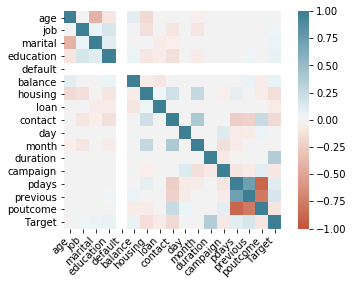

In [39]:
ax = sns.heatmap(cor_matrix, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

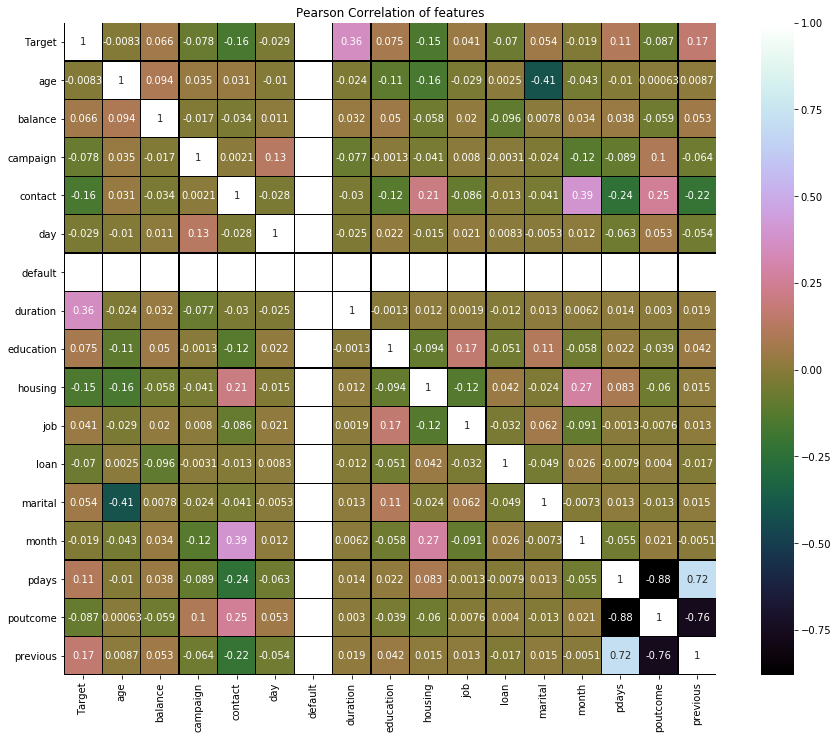

In [40]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in data2.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = data2.columns.difference(str_list) 
# Create Dataframe containing only numerical features
data_num = data2[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(data_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

Notice the strong negative outcome between poutcome and pdays

### Train Test Set Split

In [41]:
# We will use the data frame where we had created dummy variables
y = data2['Target'].values
X = data2.drop(columns = ['Target'])
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features


In [42]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
print("X_train shape : ", X_train.shape) 
print("X_test shape  : ", X_test.shape) 
print("y_train shape : ", y_train.shape) 
print("y_test shape  : ", y_test.shape) 

X_train shape :  (27619, 16)
X_test shape  :  (11837, 16)
y_train shape :  (27619,)
y_test shape  :  (11837,)


# Fitting LinearRegression Model

In [44]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 
   
# predicting the test set results 
y_pred = regressor.predict(X_test)

In [45]:
y_pred = regressor.predict(X_test) 

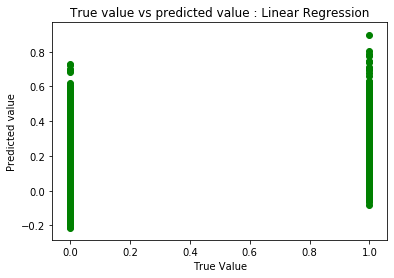

In [46]:
plt.scatter(y_test, y_pred, c = 'green') 
plt.xlabel("True Value") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 

In [47]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.16688558553462424
Mean Squared Error: 0.07304019867622472
Root Mean Squared Error: 0.2702595024716517


In [48]:
regressor.coef_

array([ 5.20144704e-03,  5.41025037e-03,  2.51447792e-02,  5.00258830e-02,
       -1.31838984e-16,  8.04075624e-02, -8.30106977e-02, -4.56517368e-02,
       -7.44980825e-02, -8.89730852e-03,  6.50545207e-02,  5.67042559e-01,
       -7.19512281e-02,  1.74213770e-01,  3.69472306e-01,  1.94871616e-01])

In [49]:
df5 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [50]:
df5.head(5)

,Actual,Predicted
0,0,0.011403
1,0,0.104883
2,0,-0.088027
3,0,0.099473
4,1,0.195400


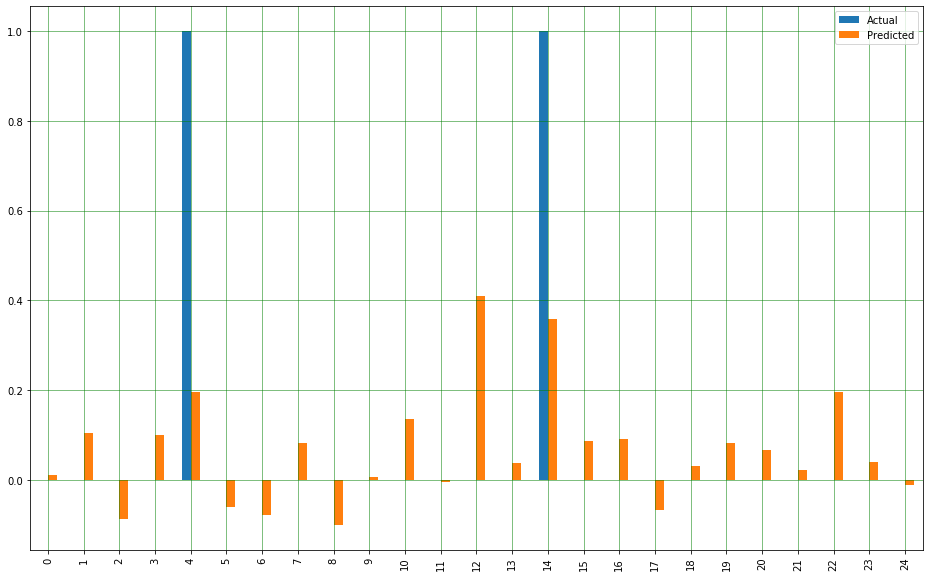

In [51]:
df5 = df5.head(25)
df5.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Fitting OLS Model from statsmodels.api

In [52]:
import statsmodels.api as sm

In [53]:
ols_model = sm.OLS(y_train,X_train)
ols_results = ols_model.fit()

In [54]:
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.280
Model:                            OLS   Adj. R-squared (uncentered):              0.279
Method:                 Least Squares   F-statistic:                              715.1
Date:                Fri, 16 Apr 2021   Prob (F-statistic):                        0.00
Time:                        00:14:37   Log-Likelihood:                         -3033.1
No. Observations:               27619   AIC:                                      6096.
Df Residuals:                   27604   BIC:                                      6220.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0483      0.009     -5.290      0.000      -0.066      -0.030
job           -0.0054      0.006     -0.987      0.324      -0.016       0.005
marital       -0.0019      0.006     -0.328      0.743      -0.013       0.009
education      0.0331      0.007      4.972      0.000       0.020       0.046
default    -8.665e-17   2.58e-18    -33.610      0.000   -9.17e-17   -8.16e-17
balance        0.0222      0.013      1.660      0.097      -0.004       0.048
housing       -0.0919      0.004    -26.212      0.000      -0.099      -0.085
loan          -0.0521      0.004    -11.785      0.000      -0.061      -0.043
contact       -0.0725      0.004    -17.657      0.000      -0.081      -0.064
day           -0.0240      0.006     -4.138      0.000      -0.035      -0.013
month          0.0463      0.007      6.970      0.000       0.033       0.059
duration       0.5552      0.009     63.249      0.000       0.538       0.572
campaign      -0.0792      0.009     -8.410      0.000      -0.098      -0.061
pdays          0.0296      0.013      2.230      0.026       0.004       0.056
previous       0.2982      0.016     18.603      0.000       0.267       0.330
poutcome       0.0491      0.008      6.240      0.000       0.034       0.064
==============================================================================
Omnibus:                     9948.017   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31161.141
Skew:                           1.897   Prob(JB):                         0.00
Kurtosis:                       6.561   Cond. No.                     2.88e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.54e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Homoscedasticity Assumption:

In [55]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression

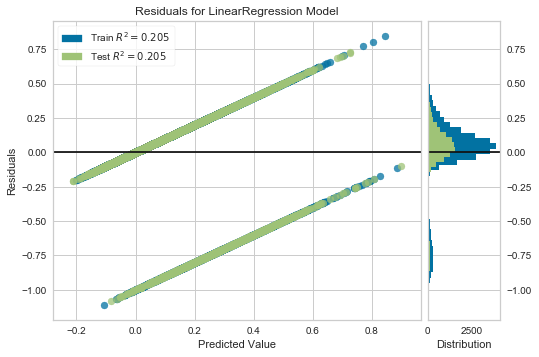

In [56]:
visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### Normal Distribution of Error Terms

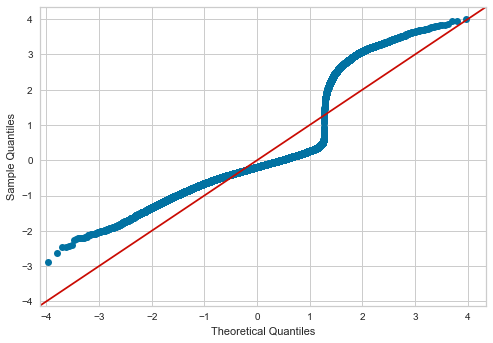

In [57]:
import statsmodels.api as sm
mod_fit=sm.OLS(y_train,X_train).fit()
res=mod_fit.resid
fig=sm.qqplot(res,fit=True,line='45')
plt.show()

In [58]:
model=sm.OLS(y_train,X_train)
results=model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.280
Model:                            OLS   Adj. R-squared (uncentered):              0.279
Method:                 Least Squares   F-statistic:                              715.1
Date:                Fri, 16 Apr 2021   Prob (F-statistic):                        0.00
Time:                        00:14:40   Log-Likelihood:                         -3033.1
No. Observations:               27619   AIC:                                      6096.
Df Residuals:                   27604   BIC:                                      6220.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Add the Machine Learning code here on data2!!!!

### Exploratory Data Analysis Based on Original Data

In [59]:
data2['age'].unique()

array([58, 44, 33, 47, 35, 28, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32, 25,
       40, 39, 52, 46, 36, 49, 59, 37, 50, 55, 54, 48, 42, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 67, 65, 68, 64, 69, 72, 71,
       70, 19, 63, 18], dtype=int64)

In [60]:
data2['balance'].unique()

array([2143,   29,    2, ..., 7038, 9710, 9299], dtype=int64)

In [61]:
sum(data2.duplicated())

0

In [62]:
df['age']  = np.where((df['age'] <20) ,'Teenager',
                                np.where((df['age'] >=20) & (df['age'] <=30),'Adult',
                               np.where((df['age']>30) & (df['age'] <=50),'Middle Aged',
np.where((df['age']>50) & (df['age'] <=65),'Old',np.where((df['age']>50) & (df['age'] <=65),'Senior','Super Senior')))))

In [63]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,Old,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,Middle Aged,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,Middle Aged,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,Middle Aged,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,Middle Aged,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,Old,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,Super Senior,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,Super Senior,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,Old,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [64]:
df['age2']  = np.where((df2['age'] <20) ,'0-20',
                                np.where((df2['age'] >=20) & (df2['age'] <=30),'20-30',
                               np.where((df2['age']>30) & (df2['age'] <=50),'30-50',
np.where((df2['age']>50) & (df2['age'] <=65),'50-65',np.where((df2['age']>50) & (df2['age'] <=65),'50-65','65+')))))

In [106]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,age2
0,Old,management,married,tertiary,no,High,yes,no,unknown,Between5-10,may,261,1,-1,0,unknown,no,50-65
1,Middle Aged,technician,single,secondary,no,Low,yes,no,unknown,Between5-10,may,151,1,-1,0,unknown,no,30-50
2,Middle Aged,entrepreneur,married,secondary,no,Low,yes,yes,unknown,Between5-10,may,76,1,-1,0,unknown,no,30-50
3,Middle Aged,blue-collar,married,unknown,no,High,yes,no,unknown,Between5-10,may,92,1,-1,0,unknown,no,30-50
4,Middle Aged,unknown,single,unknown,no,Low,no,no,unknown,Between5-10,may,198,1,-1,0,unknown,no,30-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,Old,technician,married,tertiary,no,Low,no,no,cellular,Between 10&20,nov,977,3,-1,0,unknown,yes,50-65
45207,Super Senior,retired,divorced,primary,no,High,no,no,cellular,Between 10&20,nov,456,2,-1,0,unknown,yes,65+
45208,Super Senior,retired,married,secondary,no,High,no,no,cellular,Between 10&20,nov,1127,5,184,3,success,yes,65+
45209,Old,blue-collar,married,secondary,no,Low,no,no,telephone,Between 10&20,nov,508,4,-1,0,unknown,no,50-65


### Average Age Group Loan Balance 

In [66]:
data = df.groupby('age2')['balance'].mean()
data  = pd.DataFrame({'Age':data.index, 'Average_balance':data.values})
data

,Age,Average_balance
0,0-20,497.042553
1,20-30,1023.472290
2,30-50,1286.708014
3,50-65,1773.374177
4,65+,2822.002663


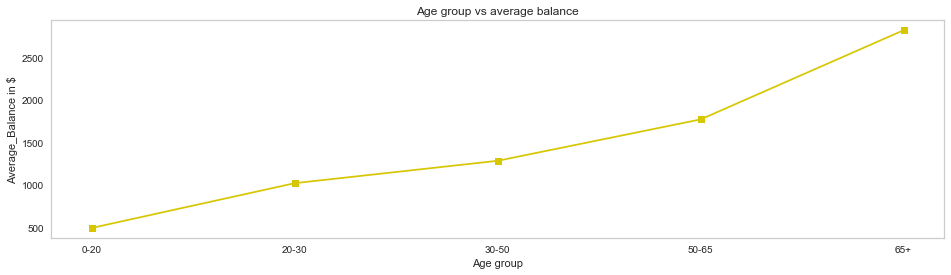

In [67]:
plt.figure(figsize = (16,4))
plt.plot('Age','Average_balance','ys-',data = data);
plt.grid();
plt.xlabel('Age group');
plt.ylabel('Average_Balance in $');
plt.title('Age group vs average balance');

### Explore Distribution of Data - Age, Education, Marital Status, Job

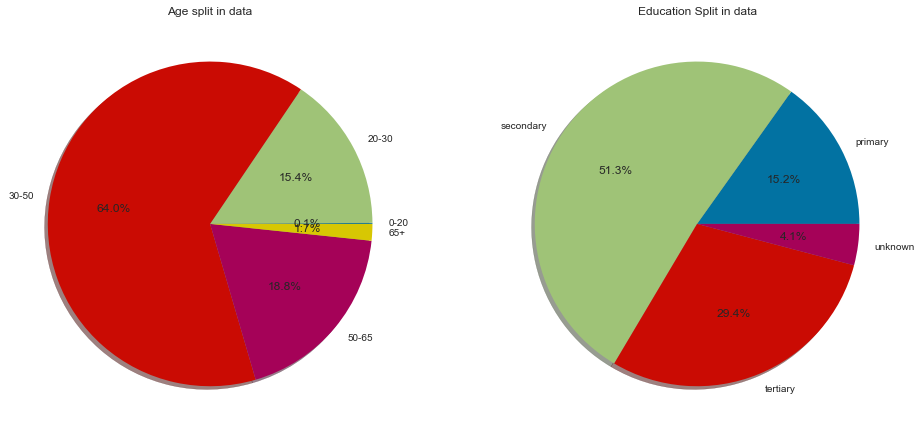

In [68]:
data_Age = df.groupby('age2')['age2'].count()
data_Education = df.groupby('education')['education'].count()
data_Age = pd.DataFrame({'Age':data_Age.index, 'Count':data_Age.values})
data_Education = pd.DataFrame({'Education':data_Education.index, 'Count':data_Education.values})
plt.figure(figsize = (16,16))
plt.subplot(121)
plt.pie(data_Age['Count'],labels = data_Age['Age'],autopct='%1.1f%%',shadow=True);
plt.title('Age split in data');
plt.subplot(122)
plt.pie(data_Education['Count'],labels = data_Education['Education'],autopct='%1.1f%%',shadow=True);
plt.title('Education Split in data');

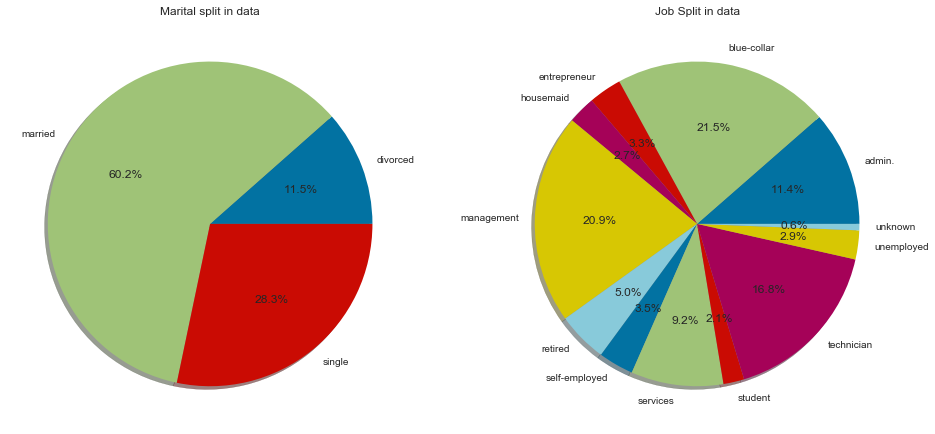

In [69]:
data_Marital = df.groupby('marital')['marital'].count()
data_Job = df.groupby('job')['job'].count()
data_Marital = pd.DataFrame({'Marital':data_Marital.index, 'Count':data_Marital.values})
data_Job = pd.DataFrame({'Job':data_Job.index, 'Count':data_Job.values})
plt.figure(figsize = (16,16))
plt.subplot(121)
plt.pie(data_Marital['Count'],labels = data_Marital['Marital'],autopct='%1.1f%%',shadow=True);
plt.title('Marital split in data');
plt.subplot(122)
plt.pie(data_Job['Count'],labels = data_Job['Job'],autopct='%1.1f%%',shadow=True);
plt.title('Job Split in data');

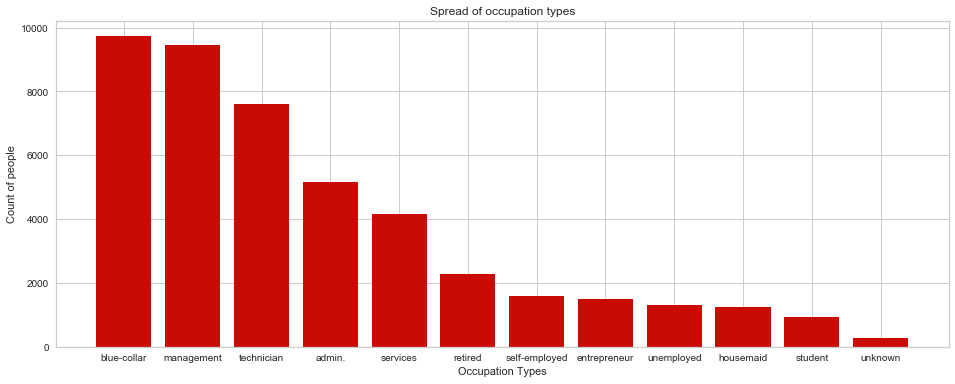

In [70]:
data_job = df['job'].value_counts();
plt.figure(figsize = (16,6));
plt.bar(data_job.index,data_job.values,color ='r');
plt.xticks(data_job.index);
plt.xlabel('Occupation Types');
plt.ylabel('Count of people');
plt.title('Spread of occupation types');

### Exploring Loan balances by Job Categories

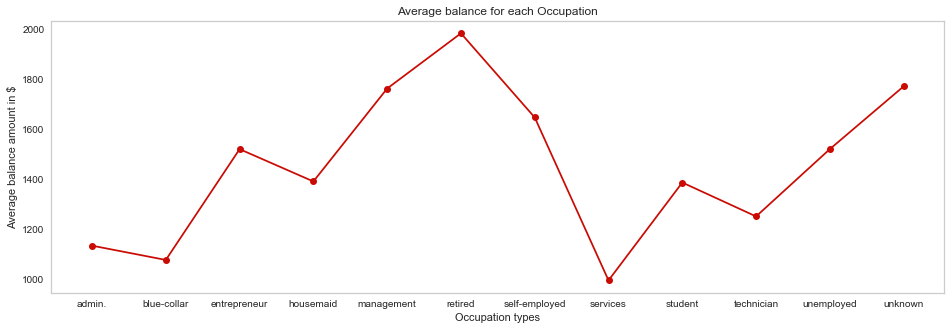

In [71]:
data = df.groupby('job')['balance'].mean();
plt.figure(figsize=(16,5));
plt.grid();
plt.plot(data.index,data.values,'ro-');
plt.xlabel('Occupation types');
plt.ylabel('Average balance amount in $');
plt.title('Average balance for each Occupation');
plt.xticks(data.index);

### Exploring Loan balances by Job Categories and Marital Status

In [72]:
data = df.groupby(['job','marital'])['job'].count();
data

job            marital 
admin.         divorced     750
               married     2693
               single      1728
blue-collar    divorced     750
               married     6968
               single      2014
entrepreneur   divorced     179
               married     1070
               single       238
housemaid      divorced     184
               married      912
               single       144
management     divorced    1111
               married     5400
               single      2947
retired        divorced     425
               married     1731
               single       108
self-employed  divorced     140
               married      993
               single       446
services       divorced     549
               married     2407
               single      1198
student        divorced       6
               married       54
               single       878
technician     divorced     925
               married     4052
               single      2620
unemployed     d

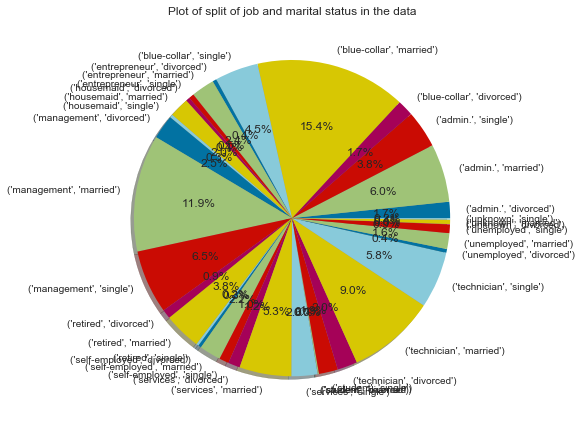

In [73]:
data = df.groupby(['job','marital'])['job'].count();
plt.figure(figsize=(16,16));
plt.subplot(211)
plt.pie(data.values,labels = data.index,autopct='%1.1f%%',shadow=True);
plt.title('Plot of split of job and marital status in the data');
data = df.groupby(['job','marital'])['balance'].mean()

In [74]:
data = df.groupby(['education','marital'])['job'].count();
data

education  marital 
primary    divorced      752
           married      5246
           single        853
secondary  divorced     2815
           married     13770
           single       6617
tertiary   divorced     1471
           married      7038
           single       4792
unknown    divorced      169
           married      1160
           single        528
Name: job, dtype: int64

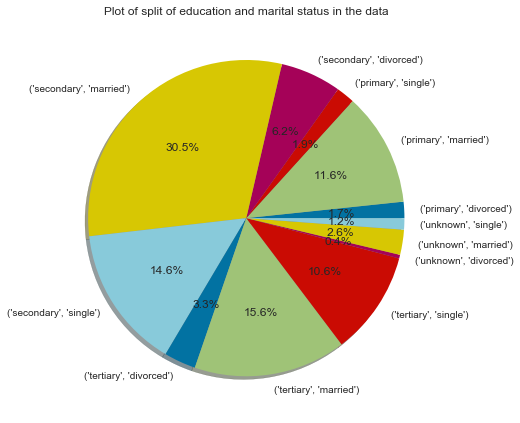

In [75]:
data = df.groupby(['education','marital'])['education'].count();
plt.figure(figsize=(16,16));
plt.subplot(211)
plt.pie(data.values,labels = data.index,autopct='%1.1f%%',shadow=True);
plt.title('Plot of split of education and marital status in the data');
data = df.groupby(['education','marital'])['balance'].mean()

In [76]:
df['balance'].value_counts()

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

In [77]:
df['balance'].mean()

1362.2720576850766

In [78]:
df['balance'].max()

102127

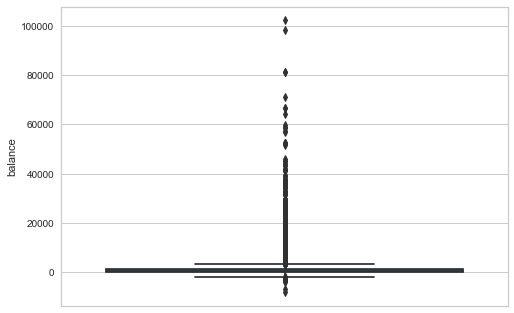

In [79]:
sns.boxplot( y = 'balance', data = df)

In [80]:
(df['balance']<0).sum()

3766

In [81]:
((df['balance']>0) & (df['balance']<1200)).sum()

24968

In [82]:
((df['balance']>1200) & (df['balance']<1500)).sum()

2057

In [83]:
((df['balance']>1500) & (df['balance']<30000)).sum()

10843

In [84]:
((df['balance']>30000).sum())

52

In [85]:
df['balance']  = np.where((df['balance'] <0) ,'Negative',
                               np.where((df['balance'] >=0) & (df['balance'] <=1200),'Low',
                               np.where((df['balance']>1200) & (df['balance'] <=1500),'Average',
                               np.where((df['balance']>1500) & (df['balance'] <=30000),'High',
                                       'very high'))))

In [86]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,age2
0,Old,management,married,tertiary,no,High,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50-65
1,Middle Aged,technician,single,secondary,no,Low,yes,no,unknown,5,may,151,1,-1,0,unknown,no,30-50
2,Middle Aged,entrepreneur,married,secondary,no,Low,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30-50
3,Middle Aged,blue-collar,married,unknown,no,High,yes,no,unknown,5,may,92,1,-1,0,unknown,no,30-50
4,Middle Aged,unknown,single,unknown,no,Low,no,no,unknown,5,may,198,1,-1,0,unknown,no,30-50


In [87]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [88]:
df['day'].mean()

15.80641879188693

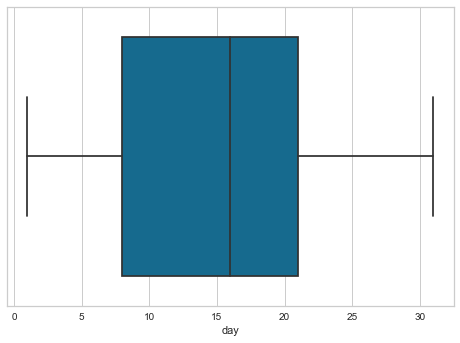

In [89]:
sns.boxplot(x='day',data=df)

In [90]:
df['day'].max()

31

In [91]:
df['day']  = np.where((df['day'] <5) ,'Below5',
                               np.where((df['day'] >=5) & (df['day'] <=10),'Between5-10',
                               np.where((df['day']>10) & (df['day'] <=20),'Between 10&20',
                               'Above 20')))

In [92]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,age2
0,Old,management,married,tertiary,no,High,yes,no,unknown,Between5-10,may,261,1,-1,0,unknown,no,50-65
1,Middle Aged,technician,single,secondary,no,Low,yes,no,unknown,Between5-10,may,151,1,-1,0,unknown,no,30-50
2,Middle Aged,entrepreneur,married,secondary,no,Low,yes,yes,unknown,Between5-10,may,76,1,-1,0,unknown,no,30-50
3,Middle Aged,blue-collar,married,unknown,no,High,yes,no,unknown,Between5-10,may,92,1,-1,0,unknown,no,30-50
4,Middle Aged,unknown,single,unknown,no,Low,no,no,unknown,Between5-10,may,198,1,-1,0,unknown,no,30-50


In [93]:
df['day'].value_counts()

Between 10&20    18389
Above 20         13097
Between5-10       9586
Below5            4139
Name: day, dtype: int64

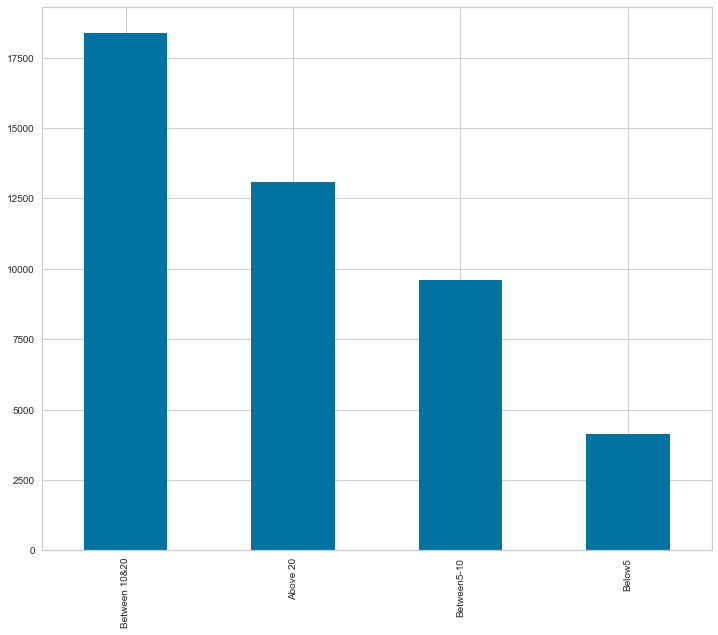

In [94]:
df['day'].value_counts().plot(kind='bar', figsize=(12,10))

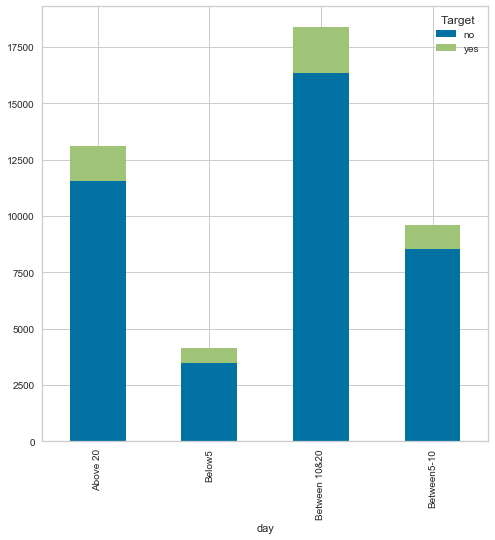

In [95]:
tab=pd.crosstab(df['day'],df['Target'])
tab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [96]:
df['duration'].value_counts().unique()

array([188, 184, 177, 175, 174, 173, 170, 169, 168, 166, 165, 164, 163,
       162, 161, 160, 159, 157, 156, 155, 154, 153, 152, 151, 150, 149,
       148, 147, 146, 145, 144, 142, 141, 140, 139, 138, 137, 136, 135,
       134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122,
       121, 120, 119, 118, 117, 116, 115, 113, 112, 111, 110, 108, 107,
       106, 105, 104, 103, 101, 100,  99,  97,  96,  95,  94,  93,  92,
        91,  90,  89,  88,  87,  86,  85,  84,  83,  82,  81,  80,  79,
        78,  77,  76,  75,  73,  72,  71,  70,  68,  67,  66,  65,  64,
        63,  62,  61,  60,  58,  57,  56,  55,  54,  53,  52,  50,  49,
        48,  47,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,  35,
        34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,
        21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,   9,
         8,   7,   6,   5,   4,   3,   2,   1], dtype=int64)

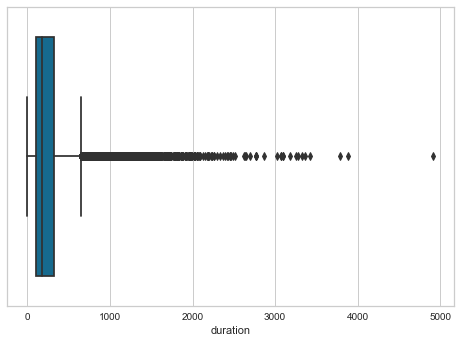

In [97]:
sns.boxplot(x='duration',data=df)

In [98]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [99]:
#df['marital2'] = df['marital'].replace(['married','single','divorced'],[0,1,2])

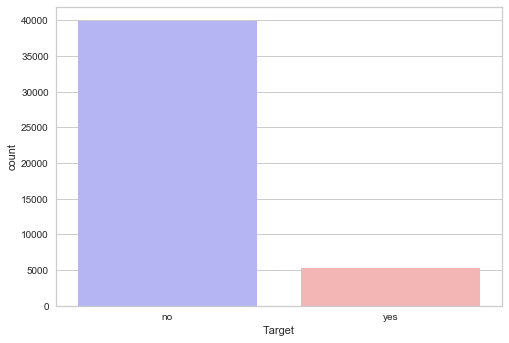

In [100]:
sns.countplot(x="Target", data=df, palette="bwr")
plt.show()

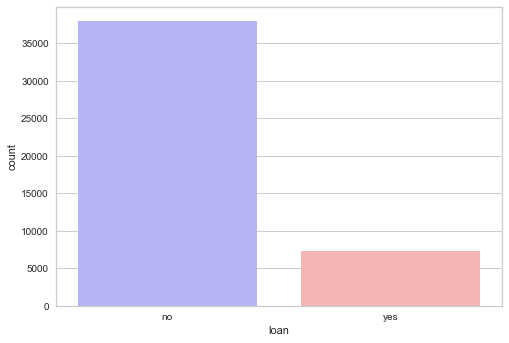

In [101]:
sns.countplot(x="loan", data=df, palette="bwr")
plt.show()

In [102]:
df.groupby('Target').mean()

,duration,campaign,pdays,previous
Target,,,,
no,221.182806,2.846350,36.421372,0.502154
yes,537.294574,2.141047,68.702968,1.170354


In [103]:
df2.groupby('Target').mean()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
0,40.838986,4.291594,1.157632,1.206778,0.019112,1303.714969,0.581008,0.169330,0.688743,15.892290,5.549797,221.182806,2.846350,36.421372,0.502154,2.587997
1,41.670070,4.703347,1.243902,1.360938,0.009832,1804.267915,0.365854,0.091511,0.274154,15.158253,5.320855,537.294574,2.141047,68.702968,1.170354,2.348459


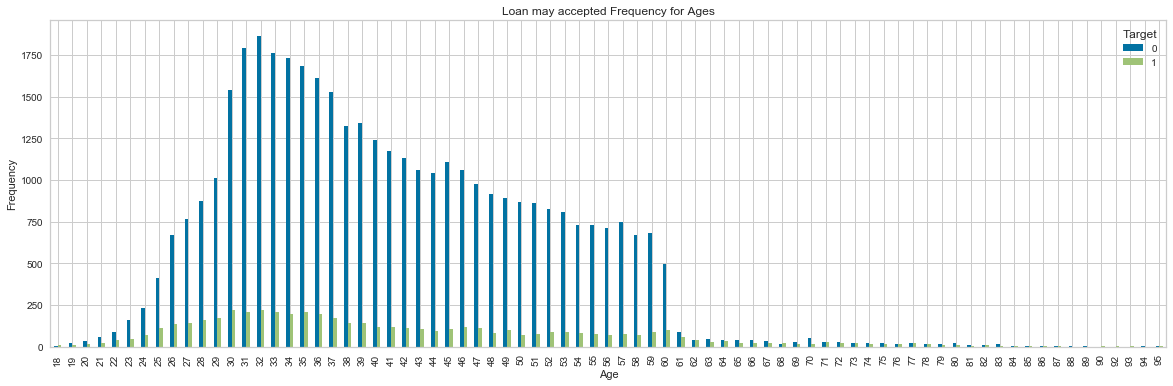

In [104]:
pd.crosstab(df2.age,df2.Target).plot(kind="bar",figsize=(20,6))
plt.title('Loan may accepted Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

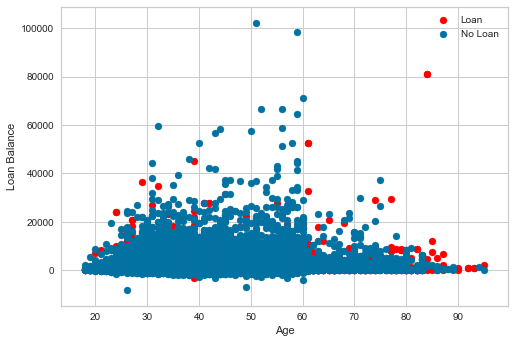

In [105]:
plt.scatter(x=df2.age[df2.Target== 1], y=df2.balance[(df2.Target== 1)], c="red")
plt.scatter(x=df2.age[df2.Target== 0], y=df2.balance[(df2.Target== 0)])
plt.legend(["Loan", "No Loan"])
plt.xlabel("Age")
plt.ylabel("Loan Balance")
plt.show()